In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step
You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/20


C:\Users\shanmuka\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8036 - loss: 0.6202 - val_accuracy: 0.9597 - val_loss: 0.1307
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9585 - loss: 0.1403 - val_accuracy: 0.9657 - val_loss: 0.1143
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9700 - loss: 0.0996 - val_accuracy: 0.9732 - val_loss: 0.0844
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9779 - loss: 0.0727 - val_accuracy: 0.9683 - val_loss: 0.0997
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9820 - loss: 0.0598 - val_accuracy: 0.9753 - val_loss: 0.0861
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9842 - loss: 0.0503 - val_accuracy: 0.9761 - val_loss: 0.0858
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9765 - val_loss: 0.0845
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.9763 - val_

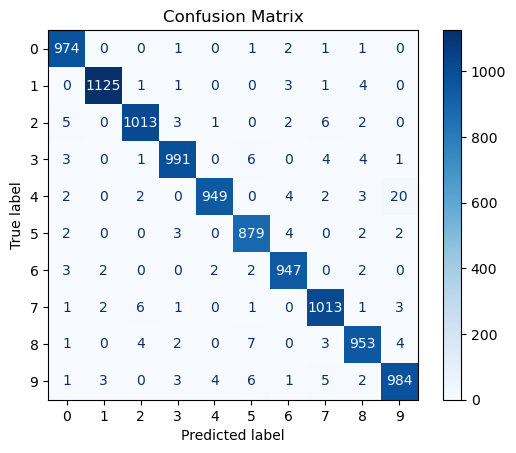

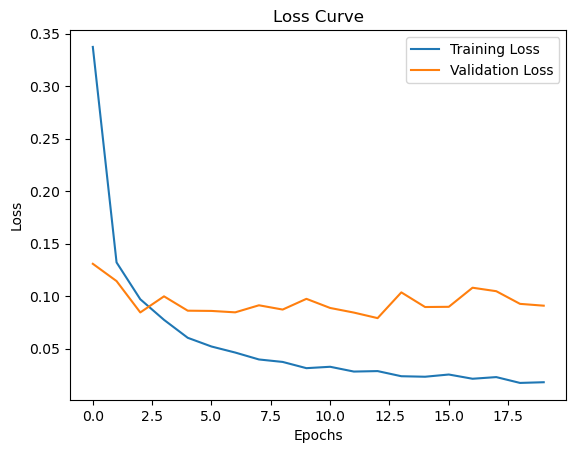

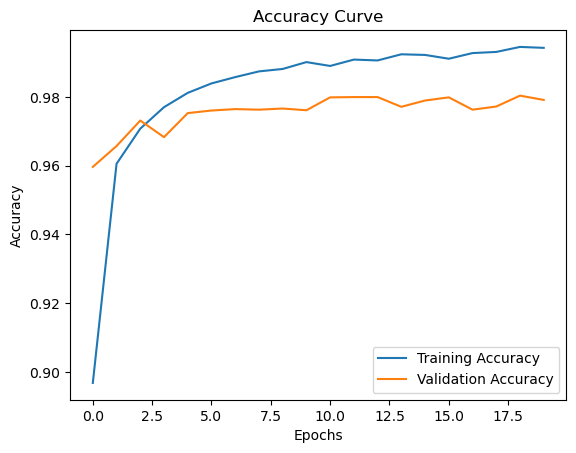

In [28]:

def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    # One-hot encode labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

# Function to create the MLP model
def create_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

# Create the model
model = create_model()

# Plot the model architecture
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir="TB",
                          expand_nested=False,
                          dpi=96)

# Display the model plot
from IPython.display import Image
Image('model.png')

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Loss: {loss:.4f}")

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


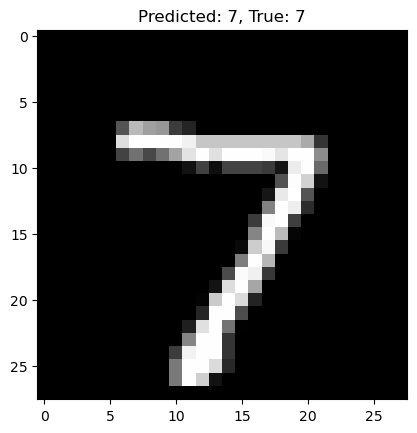

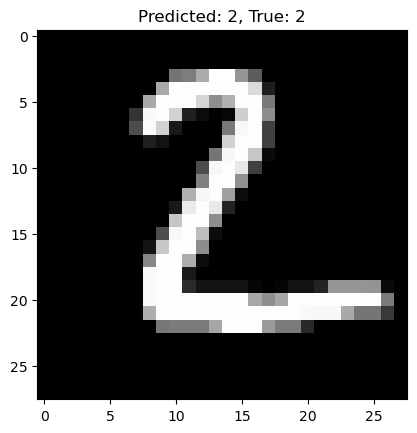

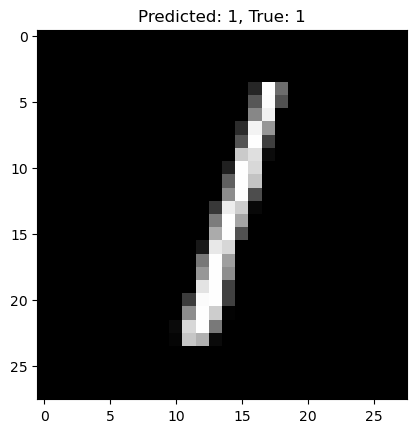

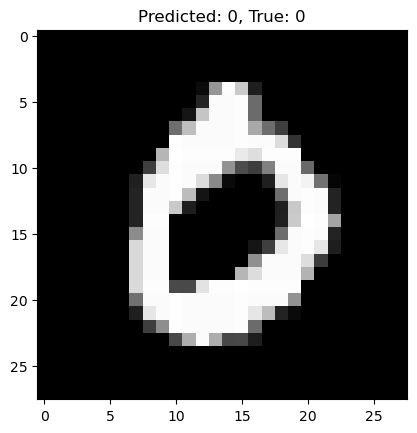

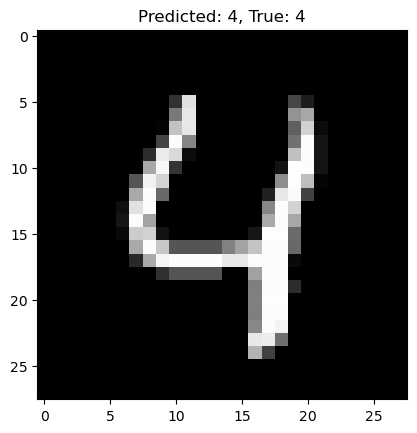

In [30]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(y_pred[i])}, True: {np.argmax(y_test[i])}')
    plt.show()